In [30]:
# !pip install pyshp
# !pip install shapely
# !pip install descartes

In [31]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [15]:
shp_file_name='Provincial_Constituency_Boundary'
data_dir='../provincial-constituency-boundary/'

In [16]:
sf = shapefile.Reader(data_dir+shp_file_name)

In [17]:
print 'number of shapes imported:',len(sf.shapes())
print ' '
print 'geometry attributes in each shape:'
for name in dir(sf.shape()):
    if not name.startswith('__'):
       print name

number of shapes imported: 577
 
geometry attributes in each shape:
bbox
parts
points
shapeType


(67.17312993788079, 68.01509618118837)

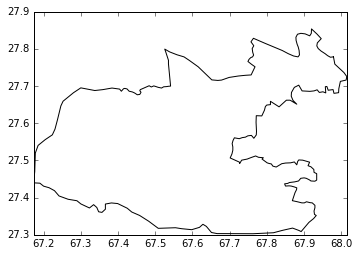

In [19]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
shape_ex = sf.shape(4)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

plt.plot(x_lon,y_lat,'k') 

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

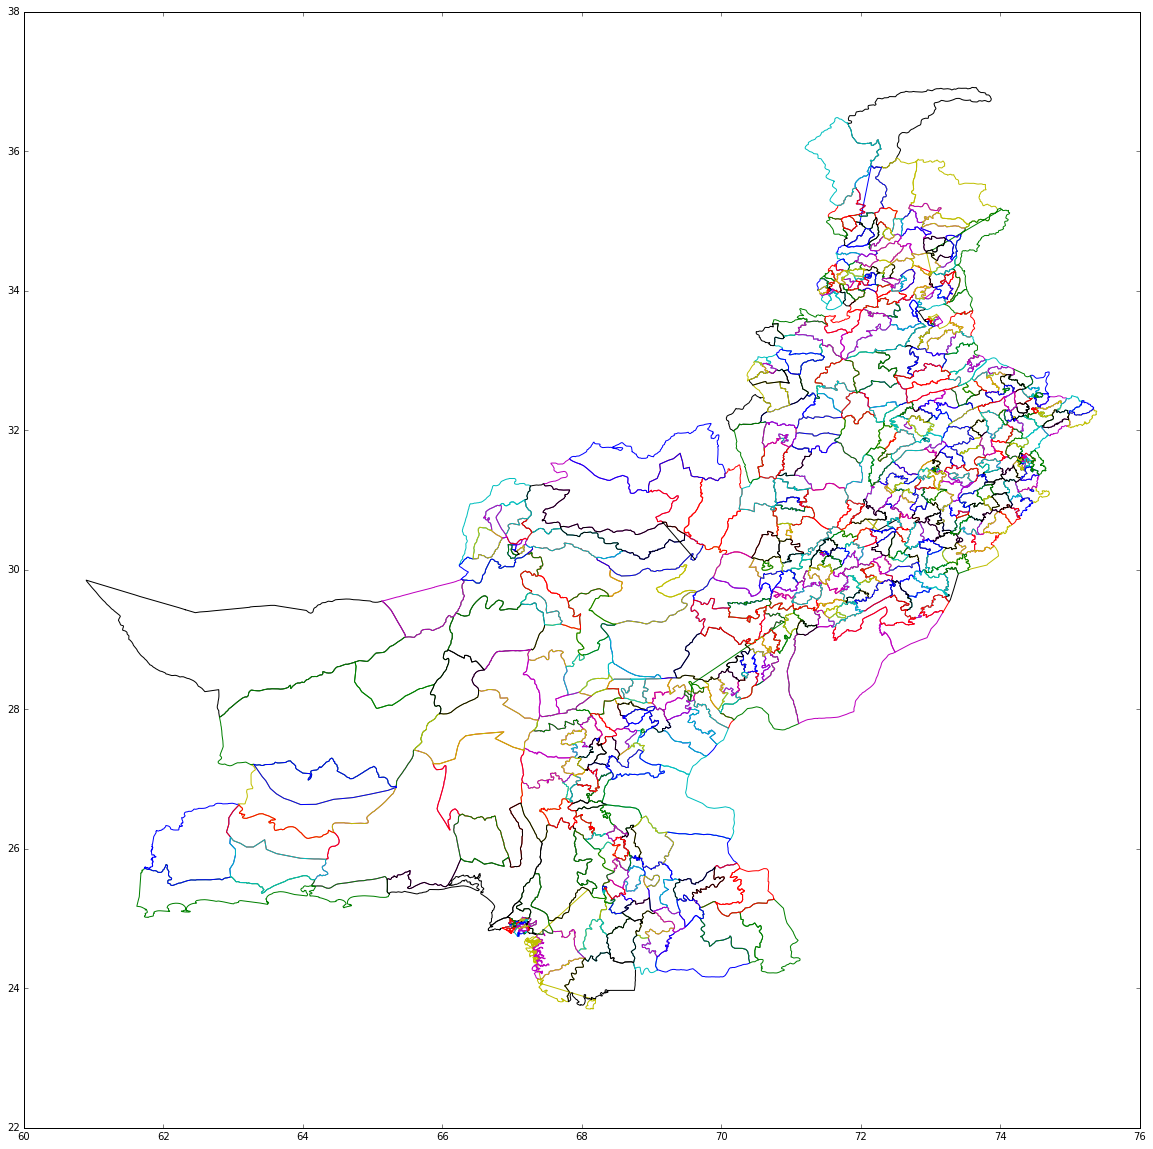

In [21]:
plt.figure(figsize=(20,20))
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
    x_lon = np.zeros((len(shape.points),1))
    y_lat = np.zeros((len(shape.points),1))
    for ip in range(len(shape.points)):
        x_lon[ip] = shape.points[ip][0]
        y_lat[ip] = shape.points[ip][1]

    plt.plot(x_lon,y_lat)

#plt.xlim(-130,-60)
#plt.ylim(23,50)

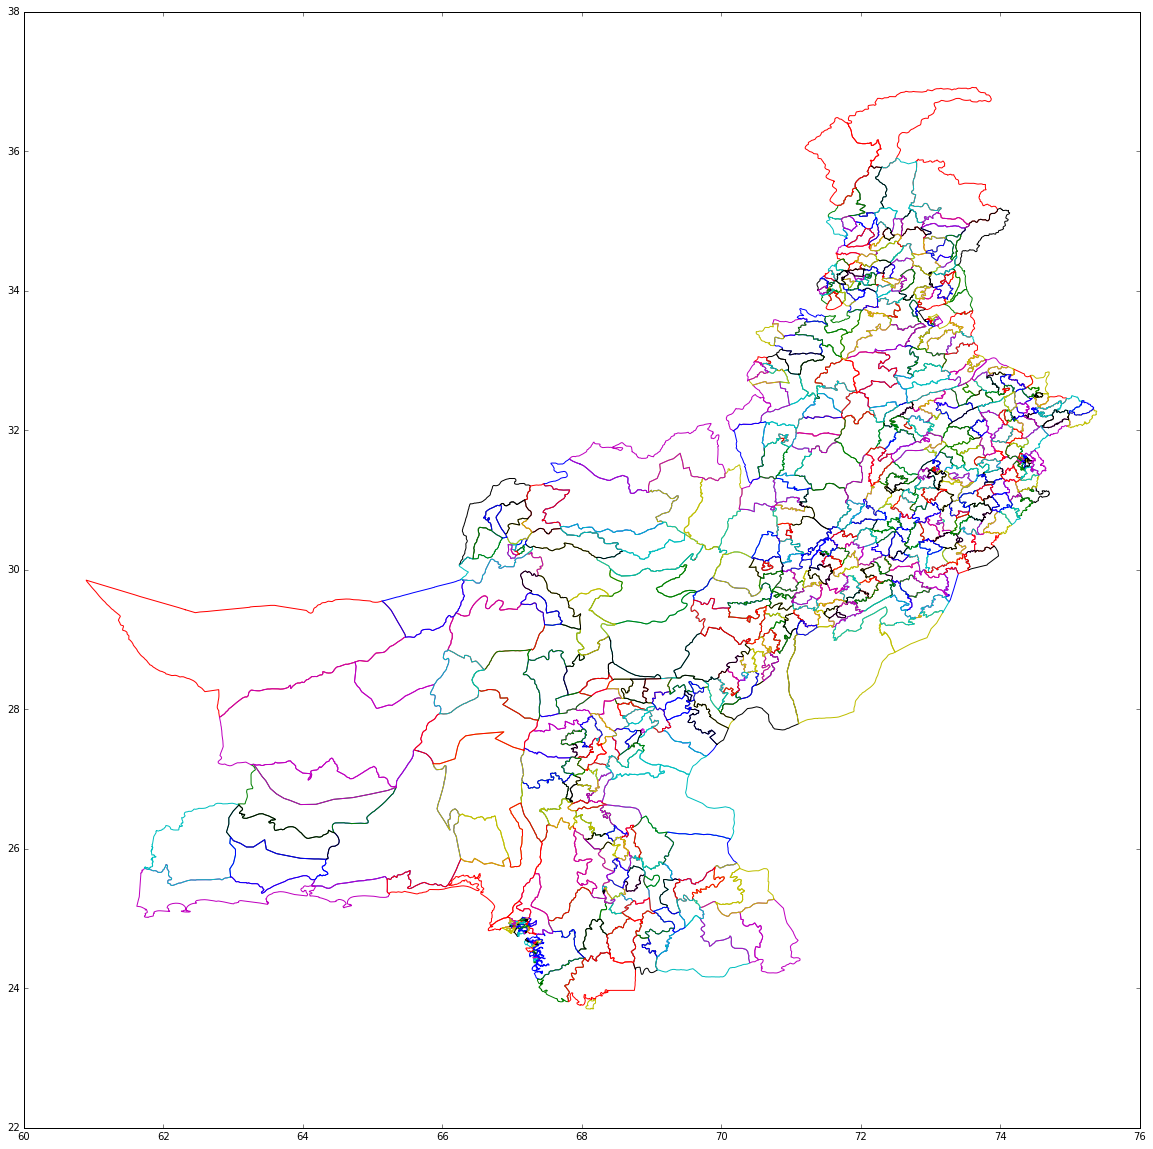

In [24]:
""" PLOTS ALL SHAPES AND PARTS """
plt.figure(figsize=(20,20))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints= len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat) 

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints
            
            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]
            
            plt.plot(x_lon,y_lat) 

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.show()

(25.676906999578875, 26.096548000076837)

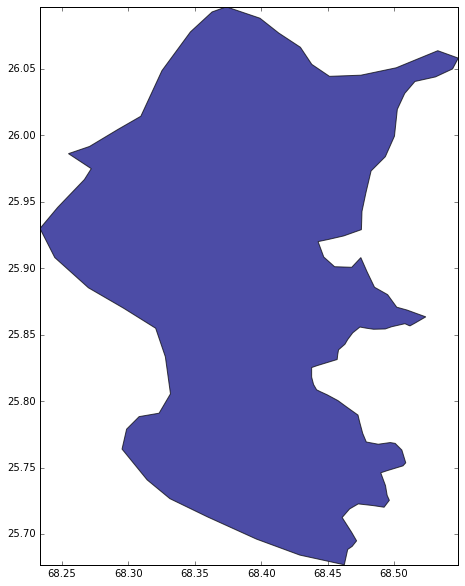

In [33]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_aspect('equal')

shape_ex = sf.shape(5) # could break if selected shape has multiple polygons. 

# build the polygon from exterior points
polygon = Polygon(shape_ex.points)
patch = PolygonPatch(polygon, facecolor=[0,0,0.5], edgecolor=[0,0,0], alpha=0.7, zorder=2)
ax.add_patch(patch)

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
plt.ylim(shape_ex.bbox[1],shape_ex.bbox[3])

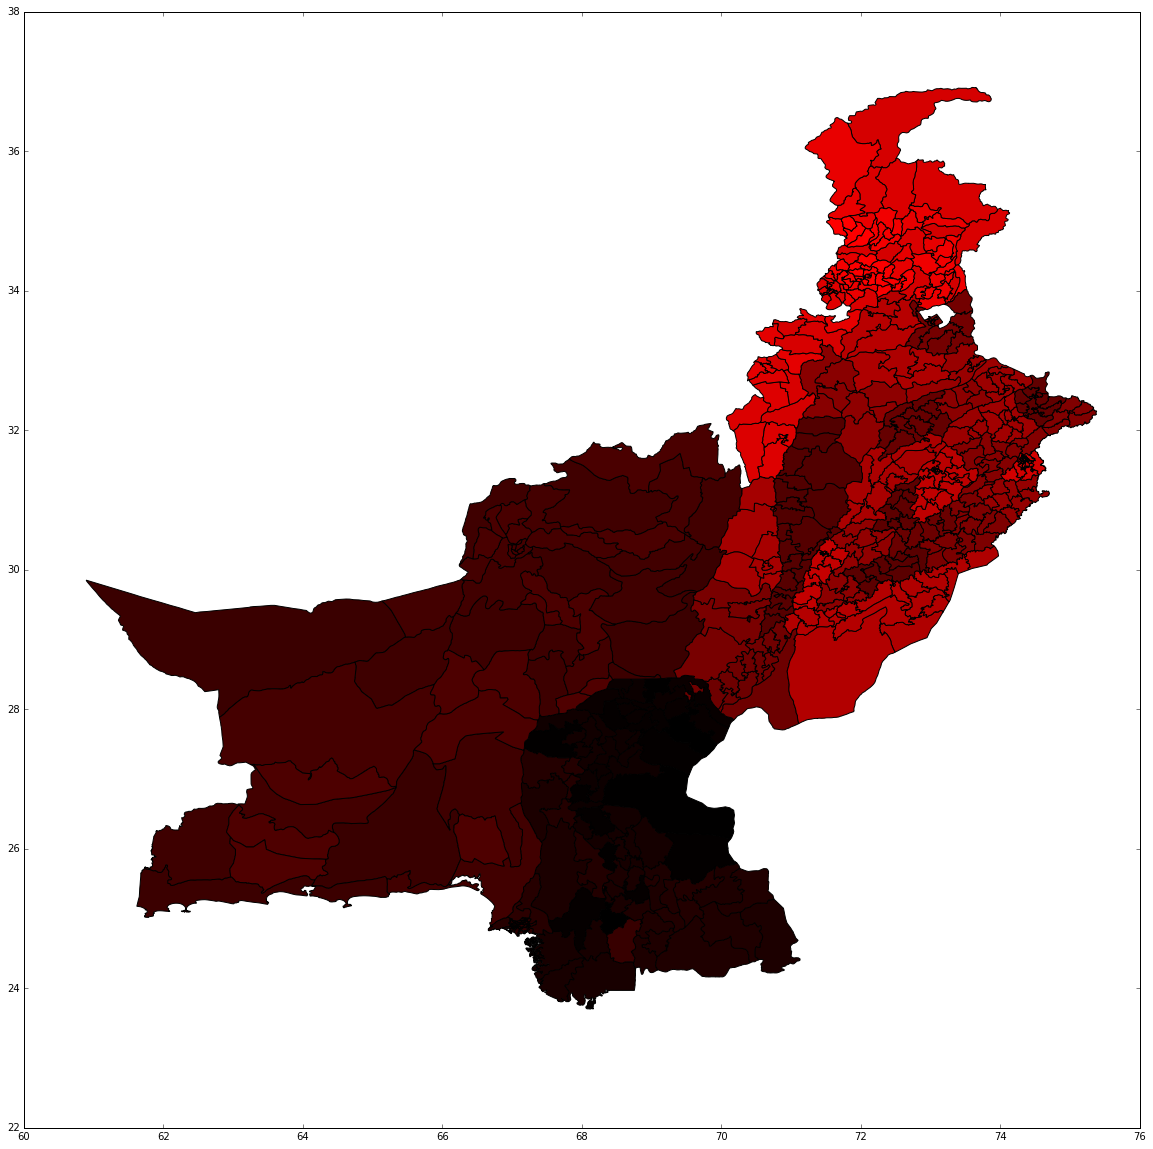

In [40]:
""" PLOTS ALL SHAPES AND PARTS """
plt.figure(figsize=(20,20))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

icolor = 1
for shape in list(sf.iterShapes()):

    # define polygon fill color (facecolor) RGB values:
    R = (float(icolor)-1.0)/577.0
    G = 0
    B = 0

    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
        ax.add_patch(patch)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)

    icolor = icolor + 1

plt.xlim(60,76)
plt.ylim(22,38)
plt.show()

In [41]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 9, 0],
 ['PROVINCE', 'C', 30, 0],
 ['DISTRICT', 'C', 30, 0],
 ['PA', 'C', 50, 0]]

In [46]:
fld = sf.fields[1:]

In [47]:
field_names = [field[0] for field in fld]
field_names

['OBJECTID', 'PROVINCE', 'DISTRICT', 'PA']

In [48]:
for rec in sf.iterRecords():
    print rec

[126, 'SINDH', 'GHOTKI', 'PS-8']
[127, 'SINDH', 'HYDERABAD', 'PS-54']
[128, 'SINDH', 'JACOBABAD', 'PS-16']
[132, 'SINDH', 'KHAIRPUR', 'PS-31']
[133, 'SINDH', 'LARKANA', 'PS-42']
[134, 'SINDH', 'MATIARI', 'PS-43']
[136, 'SINDH', 'NAUSHAHRO FEROZ', 'PS-19']
[137, 'SINDH', 'SANGHAR', 'PS-80']
[139, 'SINDH', 'S. BENAZIRABAD', 'PS-26']
[140, 'SINDH', 'SHIKARPHUR', 'PS-9']
[141, 'SINDH', 'SUKKUR', 'PS-4']
[142, 'SINDH', 'T. AYAR', 'PS-52']
[145, 'SINDH', 'THATTA', 'PS-84']
[141, 'SINDH', 'SUKKUR', 'PS-3']
[141, 'SINDH', 'SUKKUR', 'PS-2']
[0, 'SINDH', 'SUKKUR', 'PS-1']
[126, 'SINDH', 'GHOTKI', 'PS-5']
[126, 'SINDH', 'GHOTKI', 'PS-7']
[126, 'SINDH', 'GHOTKI', 'PS-6']
[140, 'SINDH', 'SHIKARPHUR', 'PS-12']
[140, 'SINDH', 'SHIKARPHUR', 'PS-11']
[140, 'SINDH', 'SHIKARPHUR', 'PS-10']
[128, 'SINDH', 'JACOBABAD', 'PS-13']
[128, 'SINDH', 'JACOBABAD', 'PS-14']
[128, 'SINDH', 'JACOBABAD', 'PS-15']
[128, 'SINDH', 'JACOBABAD', 'PS-17']
[128, 'SINDH', 'JACOBABAD', 'PS-18']
[136, 'SINDH', 'NAUSHAHRO FEROZ',

In [ ]:
""" Find max/min of record of interest (for scaling the facecolor)"""

# get list of field names, pull out appropriate index
# fieldnames of interest: ALAND, AWATER are land and water area, respectively
fld = sf.fields[1:]
field_names = [field[0] for field in fld]
# fld_name='ALAND'
# fld_ndx=field_names.index(fld_name)